## Modélisation

### Importer les librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os

# Options graphiques
sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = "{:,}".format


# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter


from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


# Import fitting tools

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV

# Chargement des modules de prétraitement des données
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Analyse des courbes d'apprentissage
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

# Import metrics tools
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import (
    f1_score,
    make_scorer,
    classification_report,
    confusion_matrix,
)

## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold
import eli5
from eli5.sklearn import PermutationImportance
import joblib

# Settings
import warnings

warnings.filterwarnings("ignore")

c:\Users\Jess\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os

root_dir = "C://Users//Jess//Desktop//OpenClassrooms//Projet_7//"
os.chdir(root_dir)

### Importation des jeux de données


In [3]:
# Importer les jeux de données
X_training = pd.read_csv("./datasets/df_final.csv")

In [4]:
X_training.sample(5)

,sk_id_curr,target,name_contract_type,code_gender,cnt_children,amt_income_total,amt_credit_x,name_type_suite,name_income_type,name_education_type,...,days_decision,cnt_payment,days_first_drawing,days_last_due,days_termination,name_contract_status,code_reject_reason,name_client_type,cnt_instalment_future,sk_dpd_y
22531,126220,0,Cash loans,F,0,"382,500.0","679,500.0",Other_B,working,high_educ,...,-723.6363636363636,22.4,"365,243.0","90,216.5","90,222.5",Canceled,XAP,Repeater,14.416666666666666,0.6666666666666666
27949,132495,0,Cash loans,F,0,"112,500.0","1,223,010.0",Unaccompanied,working,low_educ,...,"-1,038.0",15.0,"365,243.0","-1,129.0","-1,114.5",Approved,XAP,Repeater,7.142857142857143,0.0
24528,128534,0,Cash loans,F,0,"157,500.0","860,634.0",Unaccompanied,working,high_educ,...,-831.2380952380952,23.066666666666663,"365,243.0","32,136.090909090908","32,146.90909090909",Approved,XAP,Repeater,24.613636363636363,0.0
18552,121646,0,Cash loans,F,0,"135,000.0","472,500.0",Unaccompanied,working,low_educ,...,"-1,150.8125",17.166666666666668,"365,243.0","-1,388.5","-1,381.9",Approved,XAP,Repeater,8.142857142857142,0.0
38125,144145,0,Cash loans,F,0,"207,000.0","728,847.0",Unaccompanied,working,low_educ,...,-609.6153846153846,12.75,"365,243.0","136,478.375","136,482.0",Approved,XAP,Repeater,15.2,0.14


In [5]:
all_clients = X_training["sk_id_curr"].tolist()
len(all_clients)

44063

In [6]:
# Uniformiser le nom des colonnes
# X_training = X_training.rename(columns=str.lower)
X_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sk_id_curr                   44063 non-null  int64  
 1   target                       44063 non-null  int64  
 2   name_contract_type           44063 non-null  object 
 3   code_gender                  44063 non-null  object 
 4   cnt_children                 44063 non-null  int64  
 5   amt_income_total             44063 non-null  float64
 6   amt_credit_x                 44063 non-null  float64
 7   name_type_suite              43891 non-null  object 
 8   name_income_type             44063 non-null  object 
 9   name_education_type          44063 non-null  object 
 10  name_family_status           44063 non-null  object 
 11  region_population_relative   44063 non-null  float64
 12  days_birth                   44063 non-null  int64  
 13  days_employed   

In [7]:
# X_training = X_training.set_index('sk_id_curr', drop=False)
X_training[X_training["sk_id_curr"] == 115393]

,sk_id_curr,target,name_contract_type,code_gender,cnt_children,amt_income_total,amt_credit_x,name_type_suite,name_income_type,name_education_type,...,days_decision,cnt_payment,days_first_drawing,days_last_due,days_termination,name_contract_status,code_reject_reason,name_client_type,cnt_instalment_future,sk_dpd_y
13210,115393,0,Revolving loans,M,0,"360,000.0","225,000.0",Unaccompanied,working,high_educ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
X_training.iloc[13210].reset_index()
# 115393

,index,13210
0,sk_id_curr,115393
1,target,0
2,name_contract_type,Revolving loans
3,code_gender,M
4,cnt_children,0
5,amt_income_total,"360,000.0"
6,amt_credit_x,"225,000.0"
7,name_type_suite,Unaccompanied
8,name_income_type,working
9,name_education_type,high_educ


In [9]:
# X_training.to_csv("df_api.csv")

### Selectionner X et y

In [10]:
X = X_training.drop(["target", "sk_id_curr"], axis=1)
y = X_training["target"]

In [11]:
print(X.shape)
print(y.shape)

(44063, 45)
(44063,)


### Features selection

In [12]:
X_training["name_income_type"] = X_training["name_income_type"].fillna("non_renseigne")

In [13]:
list_col = X_training.columns
for col in list_col:
    print(col)
    print(X_training[col].unique())

sk_id_curr
[100002 100003 100004 ... 151031 151032 169566]
target
[1 0]
name_contract_type
['Cash loans' 'Revolving loans']
code_gender
['M' 'F' 'XNA']
cnt_children
[ 0  1  2  3  4  7  5  6  8  9 11]
amt_income_total
[2.02500000e+05 2.70000000e+05 6.75000000e+04 1.35000000e+05
 1.21500000e+05 9.90000000e+04 1.71000000e+05 3.60000000e+05
 1.12500000e+05 3.84191550e+04 2.25000000e+05 1.89000000e+05
 1.57500000e+05 1.08000000e+05 8.10000000e+04 9.00000000e+04
 4.50000000e+05 8.32500000e+04 2.92500000e+05 1.98000000e+05
 1.80000000e+05 1.30500000e+05 5.40000000e+04 5.40000000e+05
 7.65000000e+04 3.24000000e+05 1.03500000e+05 9.45000000e+04
 1.26000000e+05 7.20000000e+04 1.93500000e+05 3.15000000e+05
 2.43000000e+05 8.55000000e+04 1.62000000e+05 1.17000000e+05
 2.47500000e+05 1.44000000e+05 1.75500000e+05 5.85000000e+04
 1.19250000e+05 1.11915000e+05 1.64250000e+05 2.16000000e+05
 6.30000000e+04 4.95000000e+04 3.37500000e+05 3.08250000e+05
 7.33410000e+04 1.53000000e+05 8.77500000e+04 3.600

In [14]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)


cat_feat = X.select_dtypes("object").columns
num_feat = X.select_dtypes(np.number).columns

cat_pip = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
)
num_pip = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

transformer = make_column_transformer((cat_pip, cat_feat), (num_pip, num_feat)).fit(
    X_train
)
X_train_bis = transformer.transform(X_train)
X_test_bis = transformer.transform(X_test)
print(X_train_bis.shape)
print(X_test_bis.shape)

(30844, 74)
(13219, 74)


In [15]:
joblib.dump(transformer, "./models/transformer.sav")

['./models/transformer.sav']

In [16]:
# Smote

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X_train_bis, y_train)


counter = Counter(y_sm)
print(counter)

Counter({0: 28367, 1: 28367})


In [17]:
ridge = RidgeClassifierCV()
logistic = LogisticRegression(n_jobs=-1)
dummy = DummyClassifier()
lgbm = LGBMClassifier(n_jobs=-1)

In [18]:
# Créer un dictionnaire de modeles
models = {"ridge": ridge, "logistic": logistic, "dummy": dummy, "lgbm": lgbm}

In [19]:
# Instanciation de MLFLOW
import mlflow

# Personnalisation de l'expérience
mlflow.set_experiment("trois_models")

# Sauvegarde de l'expérience
mlflow.sklearn.autolog(silent=True)

In [20]:
def evaluation(model):
    # Evaluation avec mlflow
    with mlflow.start_run(run_name="trois_models"):

        # Make custom scoring metric
        scorer = make_scorer(f1_score, pos_label=1)

        # Fit
        model.fit(X_sm, y_sm)

        N, train_score, val_score = learning_curve(
            model,
            X_sm,
            y_sm,
            scoring="recall_weighted",
            cv=KFold(5),
            train_sizes=np.linspace(0.1, 1, 10),
        )

        # Affichage des courbes d'apprentissage
        plt.figure(figsize=(10, 6))
        plt.plot(N, train_score.mean(axis=1), label="Entrainement")
        plt.plot(N, val_score.mean(axis=1), label="Validation")
        plt.legend()

ridge
logistic
dummy
lgbm


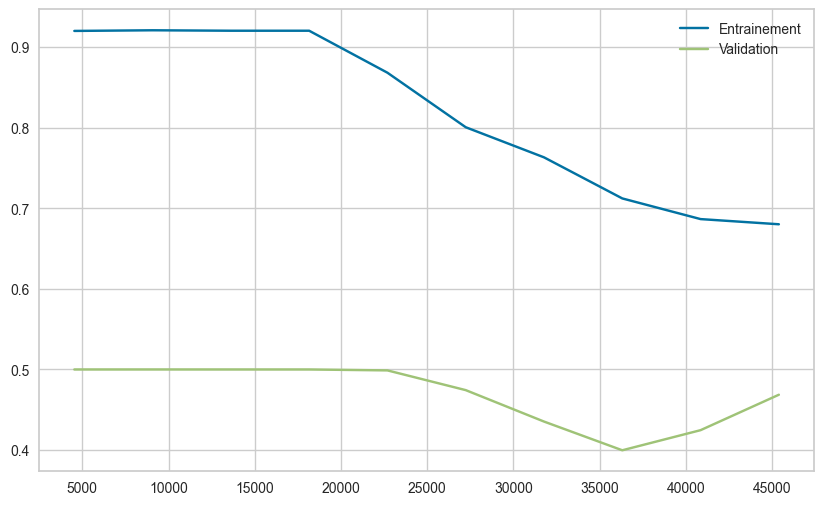

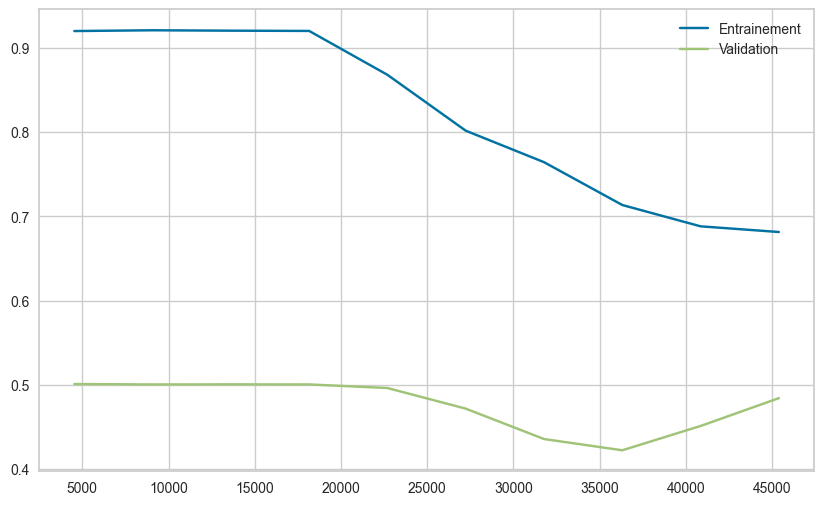

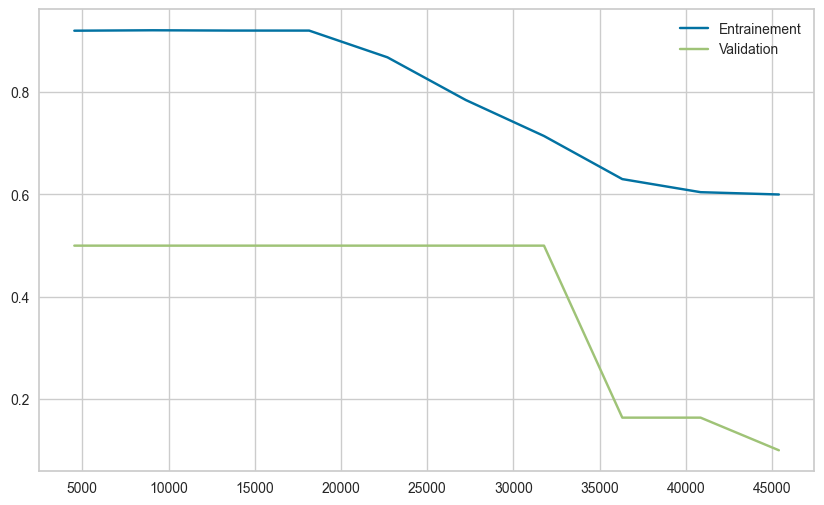

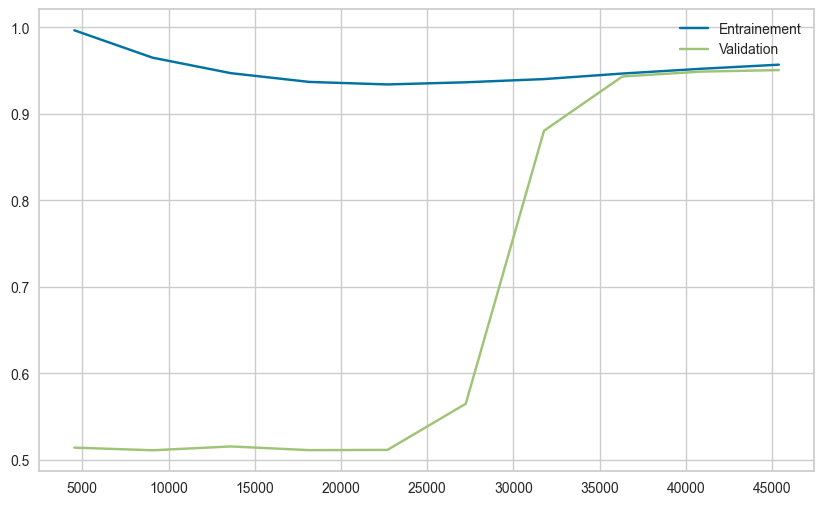

In [21]:
# Boucle for pour utiliser la liste des models dans la fonction d'évaluation
for name, model in models.items():
    print(name)
    evaluation(model)

### Prédictions

In [22]:
# Inclure mlflow
def prediction(model):
    # Inclure mlflow
    with mlflow.start_run(run_name="trois_models"):

        # Prédiction
        y_test_pred = model.predict(X_test_bis)

        # print results
        print(classification_report(y_test, y_test_pred))

In [23]:
# Boucle for pour la prédiction des modèles après l'optimisation
for name, model in models.items():
    print(name)
    prediction(model)
    print("-" * 50)

ridge
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     12140
           1       0.14      0.64      0.22      1079

    accuracy                           0.63     13219
   macro avg       0.54      0.64      0.49     13219
weighted avg       0.89      0.63      0.72     13219

--------------------------------------------------
logistic
              precision    recall  f1-score   support

           0       0.95      0.64      0.76     12140
           1       0.14      0.65      0.23      1079

    accuracy                           0.64     13219
   macro avg       0.55      0.64      0.49     13219
weighted avg       0.89      0.64      0.72     13219

--------------------------------------------------
dummy
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12140
           1       0.00      0.00      0.00      1079

    accuracy                           0.92     13219
   ma

In [24]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [25]:
# Utiliser randomizerSearchcv

lgb_params = {
    "colsample_bytree": [0.1, 0.3, 0.9],
    "max_depth": [8, 10, 14],
    "learning_rate": [0.01, 0.09, 0.1, 0.3, 0.6, 1],
    "n_estimators": [300, 600, 800, 1000],
    "num_leaves": [30, 50, 80, 100, 200, 300],
    "n_jobs": [-1],
}

grid = RandomizedSearchCV(lgbm, lgb_params, cv=KFold(5), scoring="recall_weighted")
grid.fit(X_sm, y_sm)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.9],
                                        'learning_rate': [0.01, 0.09, 0.1, 0.3,
                                                          0.6, 1],
                                        'max_depth': [8, 10, 14],
                                        'n_estimators': [300, 600, 800, 1000],
                                        'n_jobs': [-1],
                                        'num_leaves': [30, 50, 80, 100, 200,
                                                       300]},
                   scoring='recall_weighted')

In [26]:
# Evaluation
print(grid.best_score_)
print(grid.best_params_)

0.9573984142151287
{'num_leaves': 200, 'n_jobs': -1, 'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.09, 'colsample_bytree': 0.9}


In [27]:
model_final = grid.best_estimator_

In [28]:
def prediction(model):
    # Prédiction
    y_test_pred = model.predict(X_test_bis)

    # print results
    print(classification_report(y_test, y_test_pred))

In [29]:
prediction(model_final)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12140
           1       0.38      0.01      0.03      1079

    accuracy                           0.92     13219
   macro avg       0.65      0.51      0.49     13219
weighted avg       0.88      0.92      0.88     13219



In [30]:
model_final.predict(X_test_bis)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Scoring

#### Logistic

In [31]:
# Scoring

y_train_pred_log = logistic.predict_proba(X_sm)
print(
    "ROC-AUC Logistic Regression Train: {}".format(
        roc_auc_score(y_sm, y_train_pred_log[:, 1])
    )
)

y_test_proba_log = logistic.predict_proba(X_test_bis)
# get ROC AUC score

print(
    "ROC-AUC Logistic Regression Test: {}".format(
        roc_auc_score(y_test, y_test_proba_log[:, 1])
    )
)

ROC-AUC Logistic Regression Train: 0.7205274660632544
ROC-AUC Logistic Regression Test: 0.6903373982560581


In [32]:
df_proba = pd.DataFrame(y_test_proba_log, columns=["prob_0", "prob_1"])
df_proba_target = pd.DataFrame(logistic.predict(X_test_bis), columns=["predict_target"])
df_test_dataset = pd.DataFrame(y_test, columns=["target"]).reset_index()

dfx = pd.concat([df_test_dataset, df_proba, df_proba_target], axis=1)

dfx[dfx["predict_target"] == 1]

,index,target,prob_0,prob_1,predict_target
4,42565,0,0.21930557344861712,0.7806944265513829,1
6,10753,0,0.41934511833563537,0.5806548816643646,1
10,40268,0,0.3587845369528817,0.6412154630471183,1
11,42420,0,0.4068032476037724,0.5931967523962276,1
16,37564,0,0.458566289194851,0.541433710805149,1
...,...,...,...,...,...
13200,15746,0,0.3092555567107881,0.6907444432892119,1
13201,3363,0,0.33489554321259707,0.6651044567874029,1
13209,31746,0,0.2426634235482581,0.7573365764517419,1
13211,14245,1,0.19089262414170605,0.809107375858294,1


In [33]:
# Calcul du seuil
seuil = dfx["prob_1"] - dfx["prob_0"]
dfx["seuil"] = seuil
dfx[dfx["predict_target"] == 0]

,index,target,prob_0,prob_1,predict_target,seuil
0,43371,0,0.6089160753135627,0.3910839246864373,0,-0.2178321506271254
1,11912,0,0.6517703307173466,0.34822966928265336,0,-0.3035406614346932
2,27376,0,0.6483994935162568,0.3516005064837432,0,-0.2967989870325136
3,29696,0,0.5558819098515655,0.44411809014843456,0,-0.11176381970313093
5,35665,0,0.7003129611721031,0.29968703882789693,0,-0.40062592234420613
...,...,...,...,...,...,...
13213,29788,0,0.808840322065326,0.191159677934674,0,-0.6176806441306519
13214,34577,0,0.560025959294584,0.43997404070541596,0,-0.12005191858916803
13216,17533,0,0.7015913124628446,0.29840868753715544,0,-0.4031826249256891
13217,22913,0,0.5406606685201295,0.4593393314798705,0,-0.08132133704025901


Les valeurs des poids sont les suivantes :

- fn_value = -10
- tp_value = 0
- tn_value = 1
- fp_value = -1

In [35]:
def bank_score(y_true, y_pred, fn_value=-10, fp_value=-1, tp_value=0, tn_value=1):

    # Matrice de Confusion
    mat_conf = confusion_matrix(y_true, y_pred)

    tn = mat_conf[0, 0]
    fn = mat_conf[1, 0]
    fp = mat_conf[0, 1]
    tp = mat_conf[1, 1]

    Gain_tot = tp * tp_value + tn * tn_value + fp * fp_value + fn * fn_value
    G_max = (fp + tn) * tn_value + (fn + tp) * tp_value
    G_min = (fp + tn) * fp_value + (fn + tp) * fn_value

    G_normalized = (Gain_tot - G_min) / (G_max - G_min)

    return G_normalized

In [36]:
# bank score
y_test_pred_log = logistic.predict(X_test_bis)
bank_score(y_test, y_test_pred_log, fn_value=-10, fp_value=-1, tp_value=0, tn_value=1)

0.640604505275164

In [37]:
# score roc auc logistic
roc_auc_score(y_test, y_test_pred_log)

0.6431244684733104

Best-Threshold=100.00%, G-Mean=64.31%


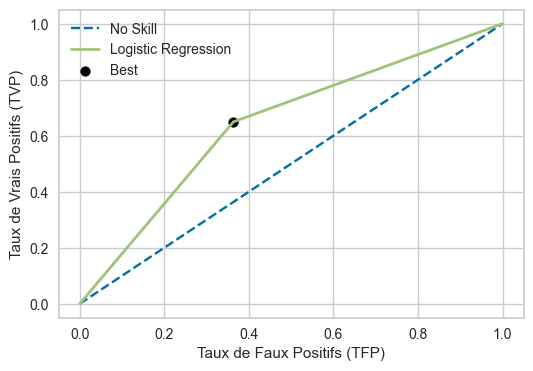

In [38]:
# calculate roc curves
TFP, TVP, thresholds = roc_curve(y_test, y_test_pred_log)

# calculate the g-mean for each threshold
gmeans = np.sqrt(TVP * (1 - TFP))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f"Best-Threshold={thresholds[ix]:.2%}, G-Mean={gmeans[ix]:.2%}")

# plot the roc curve for the model

fig, ax = plt.subplots(figsize=(6, 4))

plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(TFP, TVP, linestyle="-", linewidth=2, label="Logistic Regression")
plt.scatter(TFP[ix], TVP[ix], marker="o", color="black", label="Best")
# axis labels
plt.xlabel("Taux de Faux Positifs (TFP)")
plt.ylabel("Taux de Vrais Positifs (TVP)")
plt.legend()
# show the plot
plt.show()

In [39]:
def seuil_optimal_search(y_true, y_prob, score_function):
    thresholds = np.linspace(0.0, 1, 30)
    scores_thresholds = []

    for th in thresholds:
        y_pred = (y_prob[:, 1] - y_prob[:, 0] > th) * 1
        scores_thresholds.append(score_function(y_true, y_pred))
    # Plot
    plt.plot(thresholds, scores_thresholds)
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice banquaire")
    plt.xticks(np.linspace(0.1, 1, 10))

    idx_best_th = scores_thresholds.index(max(scores_thresholds))
    return thresholds[idx_best_th]

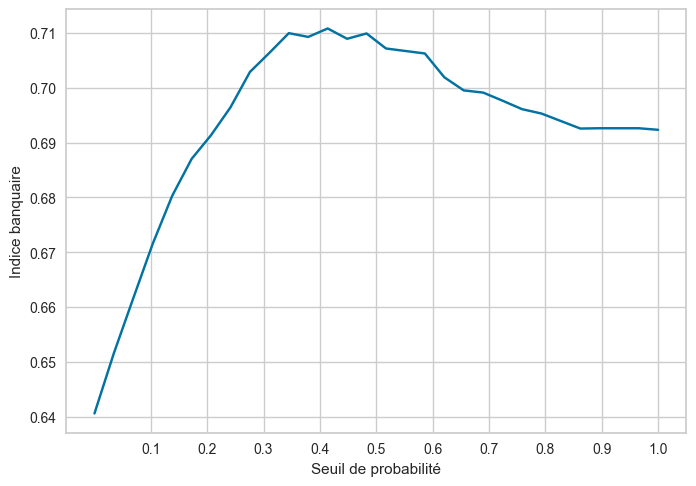

In [40]:
seuil_optimal_log = seuil_optimal_search(y_test, y_test_proba_log, bank_score)

In [41]:
seuil_optimal_log

0.41379310344827586

In [42]:
y_pred_log_optimal = (y_test_proba_log[:, 1] > seuil_optimal_log) * 1
y_pred_log_optimal

array([0, 0, 0, ..., 0, 1, 0])

In [99]:
print("rapport de classification avec la probabilité et le seuil optimal:")
print(classification_report(y_test, y_pred_log_optimal))

rapport de classification avec la probabilité et le seuil optimal:
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     12140
           1       0.12      0.79      0.20      1079

    accuracy                           0.50     13219
   macro avg       0.54      0.63      0.42     13219
weighted avg       0.89      0.50      0.60     13219



#### LGBM 

In [43]:
# Predict proba lgbm
model_final.predict_proba(X_test_bis)

array([[9.99654191e-01, 3.45809330e-04],
       [9.98746887e-01, 1.25311303e-03],
       [9.84371078e-01, 1.56289215e-02],
       ...,
       [9.99687831e-01, 3.12169403e-04],
       [9.95311348e-01, 4.68865222e-03],
       [9.99952080e-01, 4.79196124e-05]])

In [44]:
# Roc Auc Score
y_test_proba_lgbm = model_final.predict_proba(X_test_bis)[:, 1]
roc_auc_score(y_test, y_test_proba_lgbm)

0.6576270358331057

In [45]:
# score bank
y_test_pred_lgbm = model_final.predict(X_test_bis)
bank_score_lgbm = bank_score(
    y_test, y_test_pred_lgbm, fn_value=-10, fp_value=-1, tp_value=0, tn_value=1
)

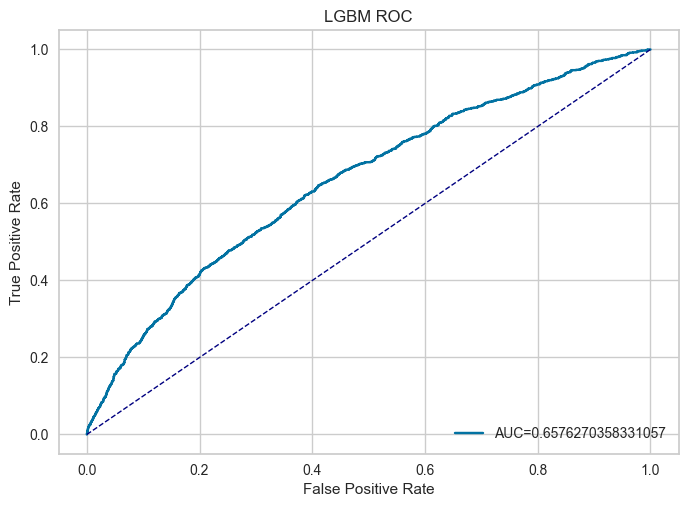

In [46]:
# Afficher la courbe ROC du lgbm
y_pred_proba_lgbm = model_final.predict_proba(X_test_bis)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lgbm)
auc = roc_auc_score(y_test, y_pred_proba_lgbm)
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
# axis labels
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.title("LGBM ROC")
# show the plot
plt.show()

In [47]:
# Fusion des probalités et des predictions avec la vraie target
y_test_proba_lgbm = model_final.predict_proba(X_test_bis)
df_proba_lgbm = pd.DataFrame(y_test_proba_lgbm, columns=["prob_0", "prob_1"])
df_pred_target_lgbm = pd.DataFrame(
    model_final.predict(X_test_bis), columns=["predict_target"]
)
df_test_dataset_lgbm = pd.DataFrame(y_test, columns=["target"]).reset_index()

df_lgbm = pd.concat([df_test_dataset_lgbm, df_proba_lgbm, df_pred_target_lgbm], axis=1)

In [48]:
# Calcul du seuil
seuil = df_lgbm["prob_1"] - df_lgbm["prob_0"]
df_lgbm["seuil"] = seuil
df_lgbm[df_lgbm["predict_target"] == 0]

,index,target,prob_0,prob_1,predict_target,seuil
0,43371,0,0.9996541906697791,0.00034580933022085075,0,-0.9993083813395582
1,11912,0,0.9987468869745472,0.0012531130254528774,0,-0.9974937739490943
2,27376,0,0.984371078451103,0.01562892154889697,0,-0.9687421569022061
3,29696,0,0.9961873658668403,0.0038126341331596782,0,-0.9923747317336806
4,42565,0,0.9019034516343136,0.09809654836568636,0,-0.8038069032686272
...,...,...,...,...,...,...
13214,34577,0,0.9988751672658995,0.0011248327341004797,0,-0.9977503345317991
13215,8388,0,0.9994617214369167,0.0005382785630832588,0,-0.9989234428738334
13216,17533,0,0.9996878305971973,0.0003121694028026464,0,-0.9993756611943947
13217,22913,0,0.9953113477804988,0.004688652219501177,0,-0.9906226955609976


In [49]:
y_test_pred_lgbm = model_final.predict(X_test_bis)

In [50]:
def seuil_optimal_search(y_true, y_prob, score_function):
    thresholds = np.linspace(0.0, 1, 30)
    scores_thresholds = []

    for th in thresholds:
        y_pred = (y_prob[:, 1] > th) * 1
        scores_thresholds.append(score_function(y_true, y_pred))
    # Plot
    plt.plot(thresholds, scores_thresholds)
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice banquaire")
    plt.xticks(np.linspace(0.1, 1, 10))

    idx_best_th = scores_thresholds.index(max(scores_thresholds))
    return thresholds[idx_best_th]

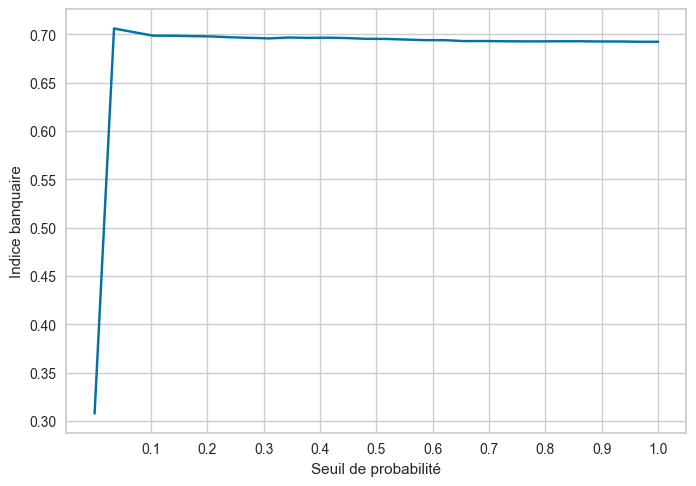

In [51]:
seuil_optimal_lgbm = seuil_optimal_search(y_test, y_test_proba_lgbm, bank_score)

In [52]:
seuil_optimal_lgbm

0.034482758620689655

In [53]:
y_pred_lgbm_optimal = (y_test_proba_lgbm[:, 1] > seuil_optimal_lgbm) * 1
y_pred_lgbm_optimal

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
print("rapport de classification avec la prediction:")
print(classification_report(y_test, y_test_pred_lgbm))

rapport de classification avec la prediction:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12140
           1       0.38      0.01      0.03      1079

    accuracy                           0.92     13219
   macro avg       0.65      0.51      0.49     13219
weighted avg       0.88      0.92      0.88     13219



In [55]:
print("rapport de classification avec la probabilité et le seuil optimal:")
print(classification_report(y_test, y_pred_lgbm_optimal))

rapport de classification avec la probabilité et le seuil optimal:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12140
           1       0.20      0.22      0.21      1079

    accuracy                           0.86     13219
   macro avg       0.57      0.57      0.57     13219
weighted avg       0.87      0.86      0.87     13219



## Confusion matrix


##### Logistic confusion matrix

<Axes: >

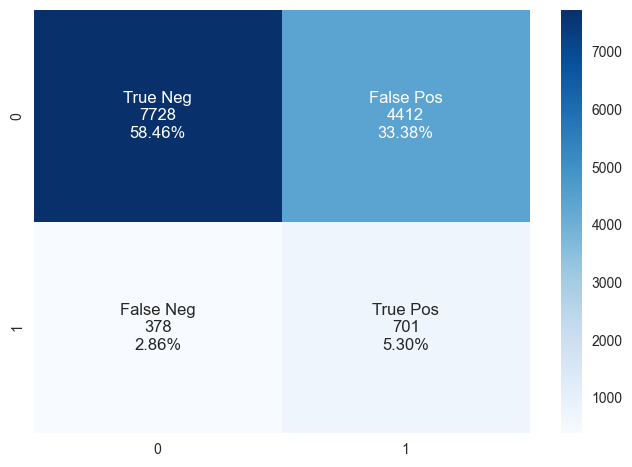

In [56]:
y_test_pred_log = logistic.predict(X_test_bis)
cf_matrix = confusion_matrix(y_test, y_test_pred_log)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

<Axes: >

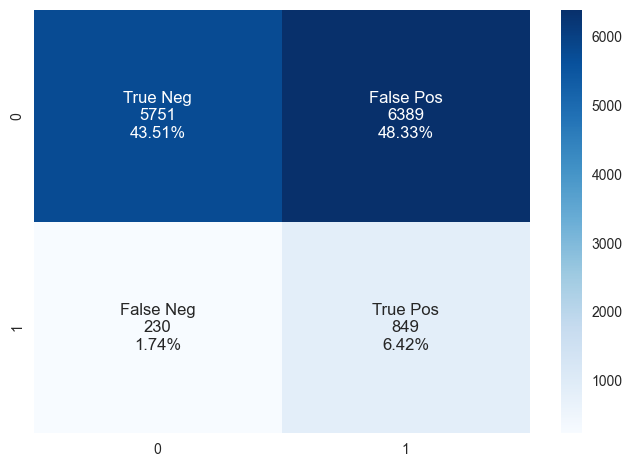

In [57]:
# Confusion matrix avec le seuil optimal
cf_matrix = confusion_matrix(y_test, y_pred_log_optimal)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

##### Ridgecv confusion matrix

<Axes: >

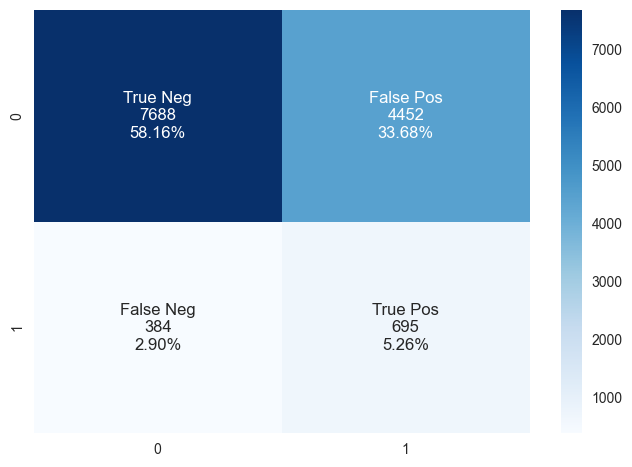

In [58]:
# Compute confusion matrix
y_test_pred_ridge = ridge.predict(X_test_bis)
cf_matrix = confusion_matrix(y_test, y_test_pred_ridge)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

##### LGBM confusion matrix

In [59]:
# Afficher le rapport de classification du LGBM

Y_pred = np.argmax(model_final.predict_proba(X_test_bis), axis=1)
print("Confusion Matrix")
print(multilabel_confusion_matrix(y_test, Y_pred))
print("Classification Report")

Confusion Matrix
[[[   16  1063]
  [   26 12114]]

 [[12114    26]
  [ 1063    16]]]
Classification Report


In [60]:
y_pred = model_final.predict(X_test_bis)
Y_pred = model_final.predict_proba(X_test_bis)
print(y_pred)
print(Y_pred)

[0 0 0 ... 0 0 0]
[[9.99654191e-01 3.45809330e-04]
 [9.98746887e-01 1.25311303e-03]
 [9.84371078e-01 1.56289215e-02]
 ...
 [9.99687831e-01 3.12169403e-04]
 [9.95311348e-01 4.68865222e-03]
 [9.99952080e-01 4.79196124e-05]]


<Axes: >

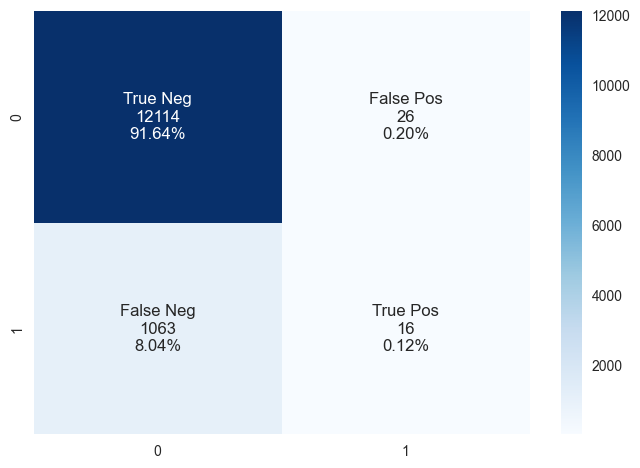

In [97]:
# Compute confusion matrix
Y_pred = np.argmax(model_final.predict_proba(X_test_bis), axis=1)
cf_matrix = confusion_matrix(y_test, Y_pred)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

<Axes: >

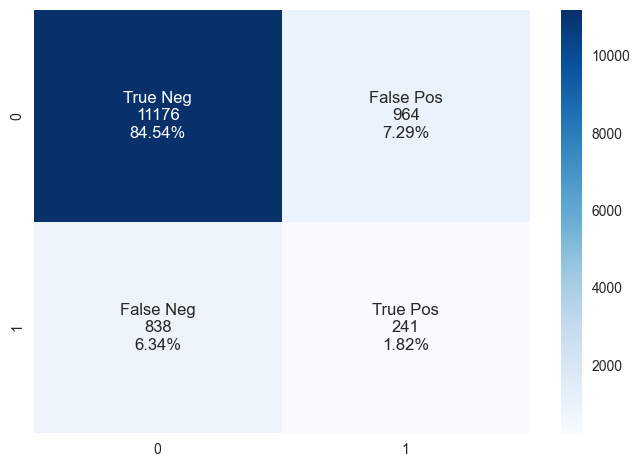

In [62]:
# Compute confusion matrix avec le seuil optimal
cf_matrix = confusion_matrix(y_test, y_pred_lgbm_optimal)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

## Importance des variables

#### Feature importance Ridge

In [63]:
coefficient = dict(zip(X.columns, ridge.coef_[0]))
coefficient_df = pd.DataFrame(data=coefficient.items(), columns=["features", "coef"])
coefficient_df.sort_values("coef", ascending=False).style.bar(
    color=["red", "green"], align="zero"
)

,features,coef
29,sk_dpd_def,0.348111
3,amt_income_total,0.319995
5,name_type_suite,0.304092
34,amt_down_payment,0.280823
32,amt_annuity,0.187656
15,region_rating_client,0.161127
11,days_employed,0.156348
0,name_contract_type,0.144937
26,amt_balance,0.139204
2,cnt_children,0.130426


#### Feature importance Logistic

##### Importance Globale

In [64]:
coefficient = dict(zip(X.columns, logistic.coef_[0]))
coefficient_df = pd.DataFrame(data=coefficient.items(), columns=["features", "coef"])
coef_log = coefficient_df.sort_values("coef", ascending=False).style.bar(
    color=["red", "green"], align="zero"
)
coef_log

,features,coef
5,name_type_suite,0.688613
29,sk_dpd_def,0.659074
34,amt_down_payment,0.490604
32,amt_annuity,0.460615
39,days_termination,0.329364
11,days_employed,0.318220
26,amt_balance,0.312382
44,sk_dpd_y,0.281553
15,region_rating_client,0.257788
0,name_contract_type,0.233085


In [65]:
transformer.get_params()

{'n_jobs': None,
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('pipeline-1',
   Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                   ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
   Index(['name_contract_type', 'code_gender', 'name_type_suite',
          'name_income_type', 'name_education_type', 'name_family_status',
          'occupation_type', 'credit_active', 'name_contract_status',
          'code_reject_reason', 'name_client_type'],
         dtype='object')),
  ('pipeline-2',
   Pipeline(steps=[('simpleimputer', SimpleImputer()),
                   ('standardscaler', StandardScaler())]),
   Index(['cnt_children', 'amt_income_total', 'amt_credit_x',
          'region_population_relative', 'days_birth', 'days_employed',
          'own_car_age', 'cnt_fam_members', 'region_rating_client',
          'region_rating_client_w_city', 'hour_appr_process_start',
          'reg_city_no

In [66]:
cat_feat

Index(['name_contract_type', 'code_gender', 'name_type_suite',
       'name_income_type', 'name_education_type', 'name_family_status',
       'occupation_type', 'credit_active', 'name_contract_status',
       'code_reject_reason', 'name_client_type'],
      dtype='object')

In [67]:
# transformation inverse des variables après le preprocessing
num_list = list(num_feat)
cat_list = list(
    transformer.named_transformers_["pipeline-1"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(cat_feat)
)

all_var = num_list + cat_list
all_var

['cnt_children',
 'amt_income_total',
 'amt_credit_x',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'own_car_age',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'hour_appr_process_start',
 'reg_city_not_work_city',
 'totalarea_mode',
 'def_30_cnt_social_circle',
 'flag_document_3',
 'amt_req_credit_bureau_year',
 'days_credit',
 'amt_credit_sum',
 'amt_balance',
 'amt_payment_current',
 'sk_dpd_x',
 'sk_dpd_def',
 'days_instalment_delay',
 'amt_instalment_delta',
 'amt_annuity',
 'amt_credit_y',
 'amt_down_payment',
 'days_decision',
 'cnt_payment',
 'days_first_drawing',
 'days_last_due',
 'days_termination',
 'cnt_instalment_future',
 'sk_dpd_y',
 'name_contract_type_Cash loans',
 'name_contract_type_Revolving loans',
 'code_gender_F',
 'code_gender_M',
 'code_gender_XNA',
 'name_type_suite_Children',
 'name_type_suite_Family',
 'name_type_suite_Group of people',
 'name_type_suite_Other_A',
 'name_type_suite_Other_B',
 'name_type_su

In [68]:
# Enregistrer les variables permutées
joblib.dump(all_var, "all_var.joblib")

['all_var.joblib']

In [69]:
len(cat_list)

40

In [70]:
# Utilisation d' Eli5
perm = PermutationImportance(logistic, scoring="balanced_accuracy")
perm.fit(X_test_bis, y_test)
eli5.show_weights(perm, feature_names=all_var)

Weight,Feature
0.0267 ± 0.0054,"name_type_suite_Spouse, partner"
0.0183 ± 0.0079,credit_active_Closed
0.0165 ± 0.0058,name_education_type_low_educ
0.0096 ± 0.0084,code_reject_reason_XAP
0.0095 ± 0.0036,flag_document_3
0.0081 ± 0.0082,code_reject_reason_CLIENT
0.0081 ± 0.0032,amt_annuity
0.0077 ± 0.0085,code_reject_reason_LIMIT
0.0074 ± 0.0052,amt_credit_x
0.0069 ± 0.0039,code_reject_reason_VERIF


##### Importance locale

In [71]:
X_training[X_training["sk_id_curr"] == 100200]

,sk_id_curr,target,name_contract_type,code_gender,cnt_children,amt_income_total,amt_credit_x,name_type_suite,name_income_type,name_education_type,...,days_decision,cnt_payment,days_first_drawing,days_last_due,days_termination,name_contract_status,code_reject_reason,name_client_type,cnt_instalment_future,sk_dpd_y
171,100200,0,Cash loans,F,0,"216,000.0","450,000.0",Unaccompanied,working,low_educ,...,"-1,302.8",16.4,"365,243.0","121,036.66666666669","121,041.0",Approved,XAP,Repeater,11.833333333333334,0.0


In [72]:
X_transformed = transformer.transform(X)
X_val = pd.DataFrame(X_transformed)
X_val.columns = all_var
cl = X_training[X_training["sk_id_curr"] == 100200]
i = cl.index.values[0]

X_val.iloc[[i]]
plot = eli5.explain_prediction(logistic, X_val.iloc[i], feature_names=all_var)
plot

Explanation(estimator='LogisticRegression(n_jobs=-1)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='credit_active_Closed', weight=0.6254650346434398, std=None, value=-2.4695314139505604), FeatureWeight(feature='amt_annuity', weight=0.334013860109164, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=0.2564080010395541, std=None, value=1.0), FeatureWeight(feature='amt_credit_x', weight=0.24746416759834805, std=None, value=1.0), FeatureWeight(feature='sk_dpd_x', weight=0.23613043914950377, std=None, value=1.0), FeatureWeight(feature='code_gender_XNA', weight=0.21763768771424916, std=None, value=1.0), FeatureWeight(feature='def_30_cnt_social_circle', weight=0.19997643680569605, std=None, value=1.0), FeatureWeight(feature='occupation_type_other', weight=0.19337402504958462, std=None, value=-1.5687420202290483), FeatureWeight(feature='code_reject_reason_CLIENT', weight=0.09743176074287249, std=None, value=-0.4928725991258925), FeatureWeight(feature='code_reject_reason_VERIF', weight=0.08406216494000435, std=None, value=-0.6820870580783692), FeatureWeight(feature='amt_balance', weight=0.07829072320814161, std=None, value=1.0), FeatureWeight(feature='name_client_type_Refreshed', weight=0.06993290025107851, std=None, value=0.30813915424794297), FeatureWeight(feature='name_type_suite_Spouse, partner', weight=0.05715576581174841, std=None, value=-0.20300200087219192), FeatureWeight(feature='credit_active_Active', weight=0.04858599817120929, std=None, value=0.6432178787071333), FeatureWeight(feature='name_family_status_other', weight=0.04546103858058856, std=None, value=0.9877752651842922), FeatureWeight(feature='name_income_type_working', weight=0.03734347870255888, std=None, value=-1.2687922270709004), FeatureWeight(feature='name_type_suite_Unaccompanied', weight=0.023181416866067305, std=None, value=-0.4709181875730261), FeatureWeight(feature='occupation_type_Low-skill Laborers', weight=0.02260068214506061, std=None, value=-0.3231589950124636), FeatureWeight(feature='code_reject_reason_XNA', weight=0.016986776931817656, std=None, value=0.404482799302442), FeatureWeight(feature='name_education_type_low_educ', weight=0.016215868439216675, std=None, value=-0.06392622349616552), FeatureWeight(feature='name_type_suite_Other_B', weight=0.0046818484099555805, std=None, value=0.40763901043140105), FeatureWeight(feature='code_reject_reason_SCOFR', weight=0.002991169777075099, std=None, value=0.05038089625815749), FeatureWeight(feature='name_client_type_XNA', weight=0.0026022719656458087, std=None, value=-0.05335965484610556), FeatureWeight(feature='name_contract_status_Refused', weight=1.2268459823233184e-18, std=None, value=2.943439653161309e-17), FeatureWeight(feature='name_contract_status_Unused offer', weight=4.657287640265695e-19, std=None, value=-2.5759047040426114e-17)], neg=[FeatureWeight(feature='name_contract_type_Cash loans', weight=-0.4906040781921911, std=None, value=1.0), FeatureWeight(feature='reg_city_not_work_city', weight=-0.3182198446709158, std=None, value=1.0), FeatureWeight(feature='amt_req_credit_bureau_year', weight=-0.25778791403921214, std=None, value=1.0), FeatureWeight(feature='cnt_children', weight=-0.2330847153435567, std=None, value=1.0), FeatureWeight(feature='code_reject_reason_LIMIT', weight=-0.1232980520732054, std=None, value=-0.5440479340213589), FeatureWeight(feature='credit_active_Sold', weight=-0.06374874633293412, std=None, value=-0.2809465515336838), FeatureWeight(feature='name_client_type_New', weight=-0.05939448736062815, std=None, value=0.37592170986311674), FeatureWeight(feature='name_family_status_married', weight=-0.0420436859340066, std=None, value=-0.6380721783518055), FeatureWeight(feature='code_reject_reason_XAP', weight=-0.04075211771320717, std=None, value=0.23393766297465124), FeatureWeight(feature='name_type_suite_Family', weight=-0.016829805695112304, st

#### Feature importance LGBM globale et locale avec Eli5

##### Feature importance globale

In [73]:
eli5.show_weights(model_final, feature_names=all_var)

Weight,Feature
0.1166,flag_document_3
0.0826,credit_active_Active
0.0783,code_reject_reason_HC
0.0748,amt_credit_x
0.0355,name_family_status_married
0.0347,reg_city_not_work_city
0.0284,days_instalment_delay
0.0254,name_client_type_XNA
0.0251,"name_type_suite_Spouse, partner"
0.0239,code_gender_F


##### Feature importance locale LGBM

In [74]:
X_transformed = transformer.transform(X)
X_val = pd.DataFrame(X_transformed)
X_val.columns = all_var
cl = X_training[X_training["sk_id_curr"] == 100200]
i = cl.index.values[0]

# i = 4
X_val.iloc[[i]]
plot = eli5.explain_prediction(model_final, X_val.iloc[i], feature_names=all_var)
plot

Explanation(estimator='LGBMClassifier(colsample_bytree=0.9, learning_rate=0.09, max_depth=10,\n               n_estimators=600, num_leaves=200)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='region_population_relative', weight=1.130216689157325, std=None, value=0.0), FeatureWeight(feature='credit_active_Active', weight=0.9389392773647699, std=None, value=0.6432178787071333), FeatureWeight(feature='name_family_status_married', weight=0.6184921467396791, std=None, value=-0.6380721783518055), FeatureWeight(feature='code_reject_reason_HC', weight=0.5383767516481134, std=None, value=-0.1348495799408986), FeatureWeight(feature='days_instalment_delay', weight=0.4661433349216078, std=None, value=1.0), FeatureWeight(feature='name_client_type_Refreshed', weight=0.39149247000192916, std=None, value=0.30813915424794297), FeatureWeight(feature='amt_down_payment', weight=0.35564404015209383, std=None, value=0.0), FeatureWeight(feature='amt_annuity', weight=0.3484734329138261, std=None, value=1.0), FeatureWeight(feature='name_client_type_XNA', weight=0.34372321146638807, std=None, value=-0.05335965484610556), FeatureWeight(feature='credit_active_Closed', weight=0.3286641569927085, std=None, value=-2.4695314139505604), FeatureWeight(feature='occupation_type_other', weight=0.2961415458426881, std=None, value=-1.5687420202290483), FeatureWeight(feature='reg_city_not_work_city', weight=0.27178255961101805, std=None, value=1.0), FeatureWeight(feature='name_client_type_Repeater', weight=0.26006861941315185, std=None, value=0.03040688607827271), FeatureWeight(feature='name_client_type_New', weight=0.23632750734141542, std=None, value=0.37592170986311674), FeatureWeight(feature='code_gender_F', weight=0.23166756102745367, std=None, value=0.0), FeatureWeight(feature='name_type_suite_Spouse, partner', weight=0.22674276701974777, std=None, value=-0.20300200087219192), FeatureWeight(feature='code_reject_reason_VERIF', weight=0.21108220695414986, std=None, value=-0.6820870580783692), FeatureWeight(feature='amt_credit_x', weight=0.19901702470829163, std=None, value=1.0), FeatureWeight(feature='name_income_type_working', weight=0.18214451511189791, std=None, value=-1.2687922270709004), FeatureWeight(feature='occupation_type_Low-skill Laborers', weight=0.17357690582669566, std=None, value=-0.3231589950124636), FeatureWeight(feature='name_contract_status_Unused offer', weight=0.1670798006874776, std=None, value=-2.5759047040426114e-17), FeatureWeight(feature='name_type_suite_Unaccompanied', weight=0.16400145178206915, std=None, value=-0.4709181875730261), FeatureWeight(feature='days_credit', weight=0.15426462267525698, std=None, value=0.0), FeatureWeight(feature='code_gender_XNA', weight=0.1399995877411608, std=None, value=1.0), FeatureWeight(feature='code_re

In [79]:
# Sérialiser le modèle lgbm
import joblib

joblib.dump(model_final, "./models/model_final_2.joblib")

['./models/model_final_2.joblib']

In [80]:
# Sérialiser le modèle logistic
import joblib

joblib.dump(logistic, "./backend/models/model_final_log.joblib")

['./backend/models/model_final_log.joblib']

In [81]:
# save the preprocessor
joblib.dump(transformer, "./models/transformer.sav")

['./models/transformer.sav']

In [82]:
test_model = joblib.load("./models/model_final_2.joblib")
test_model.predict_proba(X_test_bis)

array([[9.99654191e-01, 3.45809330e-04],
       [9.98746887e-01, 1.25311303e-03],
       [9.84371078e-01, 1.56289215e-02],
       ...,
       [9.99687831e-01, 3.12169403e-04],
       [9.95311348e-01, 4.68865222e-03],
       [9.99952080e-01, 4.79196124e-05]])

In [83]:
df_transformed = transformer.transform(
    X_training.iloc[0:10000].drop(columns=["target"], axis=1)
)

### Déploiement avec MLflow

In [84]:
from mlflow.models.signature import infer_signature

signature = infer_signature(X_sm, y_sm)

#### Sauvegarde du modèle sklearn

In [86]:
import mlflow.sklearn

mlflow.sklearn.save_model(model_final, "model_final_lgb", signature=signature)